In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

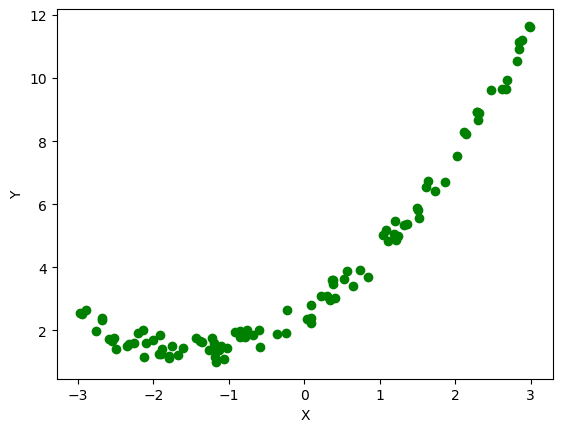

In [4]:
X=6 * np.random.rand(100,1) - 3
y=0.5 * X**2 + 1.5 * X + 2 + np.random.rand(100,1)
#quadratic equation used - y=0.5x^2+1.5x+2+outlires

plt.scatter(X,y,color='g')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Implementing Simple Linear Regression

In [8]:
Linear_model=LinearRegression()

In [9]:
Linear_model.fit(X_train,y_train)

LinearRegression()

In [12]:
score=r2_score(y_test,Linear_model.predict(X_test))
print(score)

0.7797854921073801


Text(0, 0.5, 'Y')

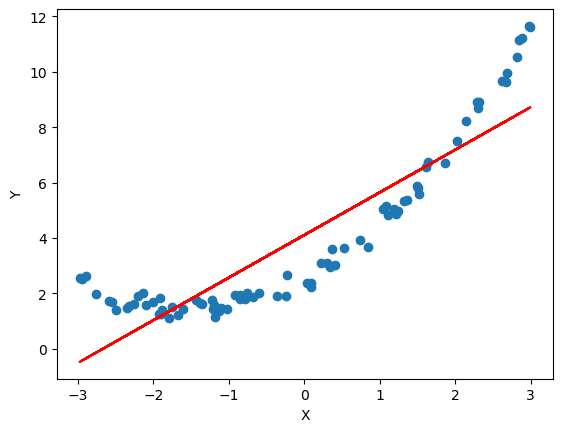

In [14]:
plt.plot(X_train,Linear_model.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X')
plt.ylabel('Y')

Apply ploynomial transformation

In [16]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [17]:
polynomial=LinearRegression()
polynomial.fit(X_train_poly,y_train)
y_pred=polynomial.predict(X_test_poly)
poly_score=r2_score(y_test,y_pred)
print(poly_score)

0.9895421342552282


In [18]:
print(polynomial.coef_)

[[0.         1.50446935 0.49160348]]


In [19]:
print(polynomial.intercept_)

[2.56782192]


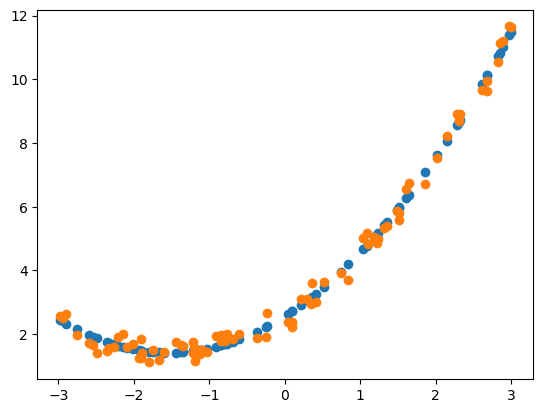

In [21]:
plt.scatter(X_train,polynomial.predict(X_train_poly))
plt.scatter(X_train,y_train)

Prediction for new data

In [22]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

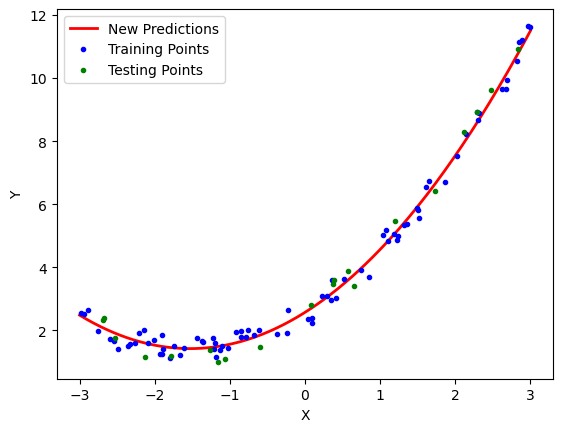

In [24]:
y_new=polynomial.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label="New Predictions")
plt.plot(X_train,y_train,"b.",label="Training Points")
plt.plot(X_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()